# Libraries and Functions

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime 
from PIL import Image

In [7]:
# Custom functions 
from utils import * #barchart , plot_incidenza, region_plot , update_regioni , create_italy , create_popolazione  

# Data

### Load Data

In [2]:
try :
    italy = pd.read_csv('region_shape_population.csv')
    
except :    
    shape = create_regioni_shape()
    popolazione = create_popolazione()
    italy = create_italy(shape , popolazione)

In [3]:
try :
    regioni = pd.read_csv('covid_regioni.csv' ) # data up to 2021-03-13
except :    
    daterange = pd.date_range(start = '20200306',end='20210313' )
    daterange = [str(dt.date()).replace('-','') for dt in daterange]
    regioni = create_df_regioni(daterange)

## Create New data 

In [ ]:
regioni.to_csv('covid_regioni.csv') # last time? 2021-03-13

## Update Data Set

In [5]:
# last date in the dataset
regioni.tail(1).data

7832    2021-03-13 17:00:00
Name: data, dtype: object

In [6]:
daterange = pd.date_range(start = '20210314',end='20210324' )
daterange = [str(dt.date()).replace('-','') for dt in daterange]
regioni_new = create_df_regioni(daterange)

In [8]:
regioni_all = pd.concat([regioni,regioni_new],axis = 0) 

In [10]:
regioni_all.to_csv('covid_regioni.csv' )

In [ ]:
#regioni_all.to_csv('covid_regioni.csv')

## Explore data

In [ ]:
regioni.describe().loc[['mean','std','max'],['nuovi_positivi','terapia_intensiva','deceduti','dimessi_guariti']]

In [ ]:
regioni.head()

In [ ]:
regioni.columns

In [ ]:
regioni['variazione_totale_positivi']

# Charts : Hospitalized , New Positive , Deceased , Dismissed

### Hositalized

In [4]:
regioni_all = regioni.copy()

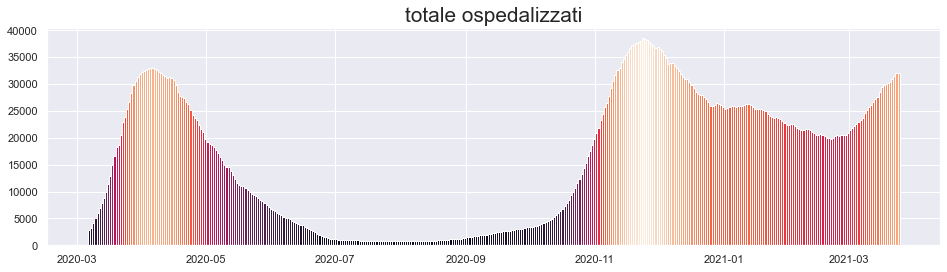

In [11]:
barchartv1(regioni_all , 'totale_ospedalizzati',  'rocket')

### New Positives

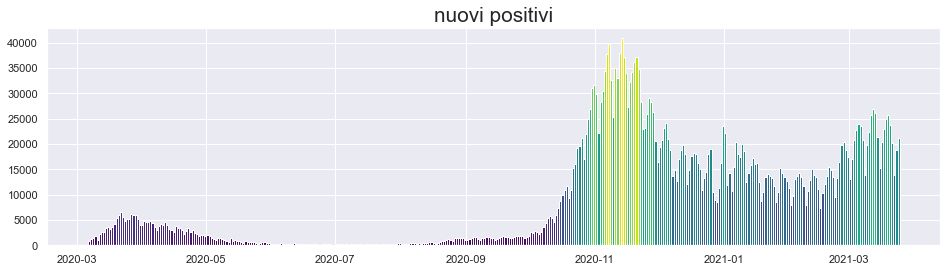

In [12]:
barchartv1(regioni_all , 'nuovi_positivi',  'viridis')

### Cumulative Deceased

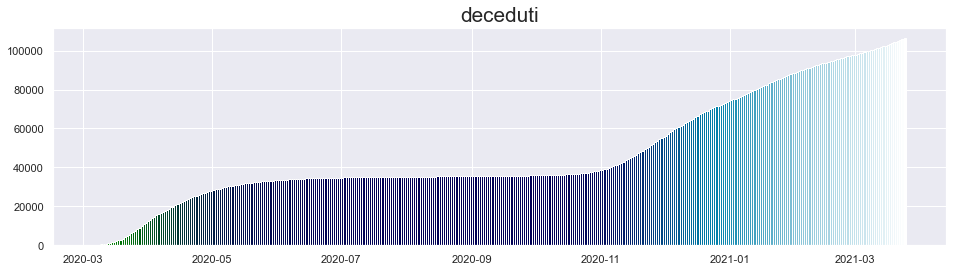

In [13]:
barchartv1(regioni_all , 'deceduti', 'ocean')

### Cumulative Dismissed

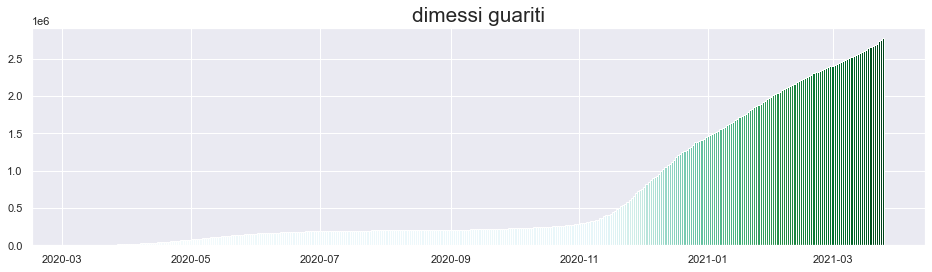

In [14]:
barchartv1(regioni_all , 'dimessi_guariti','BuGn')

### Possible colors

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

### Deceased per day

In [41]:
deceduti = regioni_all.groupby('data')['deceduti'].sum() 
#ospedalizzati = regioni.groupby('data')['totale_ospedalizzati'].sum() 

In [44]:
deceased_daily = np.insert(deceduti.values[1:] - deceduti.values[:-1],0,deceduti[0]) 

In [ ]:
color_map = 'icefire'
clr = sns.color_palette(color_map , n_colors =1+ deceased_daily.max())
colors = [clr[x] for x in deceased_daily]
#labels = [x[8:10]+x[4:7] for x in deceduti.index[[30*i for i in range(1+(data.shape[0]//30))]]]
fg , ax = plt.subplots(figsize = (16,5))
#plt.grid(color = 'grey')
#plt.xticks([30*i for i in range(1+(data.shape[0]//30))] , labels=labels)
#plt.bar(deceduti.index , deceased_daily, width = 1.0 , color = colors)
plt.bar(np.arange(len(deceased_daily)) , deceased_daily, width = .9 , color = colors)
plt.title(label= 'Deceased per day' , fontdict ={'fontsize':'xx-large'});

# Map plot

## Positives / Tests

In [55]:
regioni_all.columns

Index(['Unnamed: 0', 'data', 'stato', 'codice_regione',
       'denominazione_regione', 'lat', 'long', 'ricoverati_con_sintomi',
       'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi',
       'dimessi_guariti', 'deceduti', 'casi_da_sospetto_diagnostico',
       'casi_da_screening', 'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')

In [52]:
positivi = regioni_all.groupby(['data','denominazione_regione'])['nuovi_positivi'].sum().unstack()
tamponi = regioni_all.groupby(['data','denominazione_regione'])['tamponi'].sum().unstack()

In [76]:
def show_im_positivi():
    M = tamponi.iloc[1:,:].values-tamponi.iloc[:-1,:].values
    M = np.insert(M, 0, M[0,:], axis = 0)
    pos_test = 100*(positivi/M)
    pos_test.replace(to_replace= np.inf , value = 0 , inplace = True)
    reg = pos_test.columns.values
    labels = [str(p)[8:10]+'-'+str(p)[5:7] for p in pos_test.index.values[::30]]
    plt.subplots(figsize = (18,5))
    plt.yticks(ticks = np.arange(21) , labels = reg)
    plt.title('Number of positives over Tests in %' , fontdict ={'fontsize':'xx-large'})
    #plt.xticks(ticks = [0,30,60,90,120,150,180,210,240],labels = labels )
    #plt.legend(labels = [0,50])

    plt.imshow(pos_test.T ,aspect = 'auto', vmin = 0 , vmax = 50 , cmap = 'viridis')
    #plt.legend()#labels = [0,10,20,30,40,50])

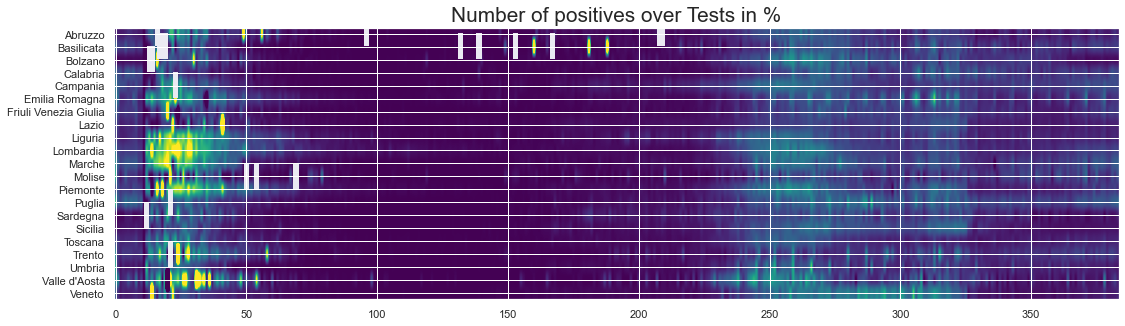

In [77]:
show_im_positivi()

In [ ]:

#tamponi = regioni_all.groupby(['data','denominazione_regione'])['tamponi'].sum().unstack()

In [ ]:
regioni_all['percentuale_positivi'] = 100*(regioni_all['totale_positivi_test_molecolare']+regioni_all['totale_positivi_test_antigenico_rapido'])/(regioni_all['tamponi_test_molecolare']+regioni_all['tamponi_test_antigenico_rapido'])
ppdf = regioni_all[~regioni_all.percentuale_positivi.isna()]

In [78]:
positivi = ppdf.groupby(['data','denominazione_regione'])['percentuale_positivi'].sum().unstack()

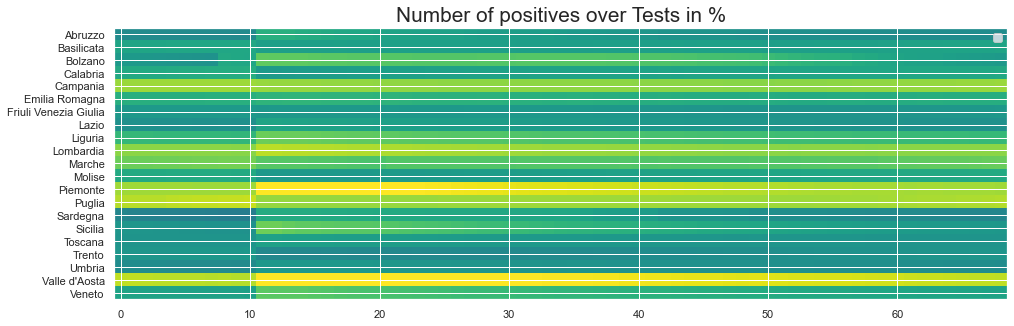

In [88]:
#M = tamponi.iloc[1:,:].values-tamponi.iloc[:-1,:].values
#M = np.insert(M, 0, M[0,:], axis = 0)
#pos_test = 100*(positivi/M)
#pos_test.replace(to_replace= np.inf , value = 0 , inplace = True)
reg = positivi.columns.values
#labels = [str(p)[8:10]+'-'+str(p)[5:7] for p in positivi.index.values[::30]]
plt.subplots(figsize = (18,5))
plt.yticks(ticks = np.arange(21) , labels = reg)
plt.title('Number of positives over Tests in %' , fontdict ={'fontsize':'xx-large'})
#plt.xticks(ticks = [0,30,60,90,120,150,180,210,240],labels = labels )
#plt.legend(labels = [0,50])
plt.imshow(positivi.T , vmin = 0 , vmax = 11 , cmap = 'viridis')
#plt.imshow(positivi.T ,aspect = 'auto', vmin = 0 , vmax = 11 , cmap = 'viridis')
plt.legend(labels = ['0','13'])

# Deceised / Hospitalized for each region

In [ ]:
deceduti = regioni.groupby(['data','denominazione_regione'])['deceduti'].sum().unstack()
hospitalized = regioni.groupby(['data','denominazione_regione'])['totale_ospedalizzati'].sum().unstack() 

In [ ]:
deceduti.iloc[1:,:] = deceduti.iloc[1:,:].values - deceduti.iloc[:-1,:].values

In [ ]:
def deceased_hospitilzed(df, day = '2020-11-01' ,save = True):
    ''' '''
    
    
    df.index = pd.to_datetime(df.reset_index().data)
    df = df[day].unstack()
    df.name = 'dec'
    df = italy.merge(df, on ='denominazione_regione')
    gdf = gpd.GeoDataFrame(df, geometry = df.geometry)
    #gdf['totale_casi per 1m abitanti'] = 1e6*gdf['nuovi_positivi'] // gdf['popolazione']
    
    fig, ax = plt.subplots(figsize= (12,8))
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Deceased over Hospitalized \n {day}')
    
    gdf.plot(column = 'dec',cmap = 'Oranges',vmax = 5,vmin = 0,legend =True,ax = ax)
    if save:
        plt.savefig(fname = f'./images/it_cv{day}.png' ,format = 'png')

### For every 100 hospitilized how many die on the same day?

In [ ]:
df = 100*deceduti/(hospitalized+1)
deceased_hospitilzed(df, day = '2020-11-20' ,save = False)

# Incidenza su 7 giorni per regione

In [19]:
regioni_shape = create_regioni_shape()
popolazione = create_popolazione()

In [20]:
regioni_shape = regioni_shape.join(popolazione ,on = 'denominazione_regione' )

In [21]:
df = regioni_all.copy()
df.data = pd.to_datetime(df.data)
df = df.set_index('data')

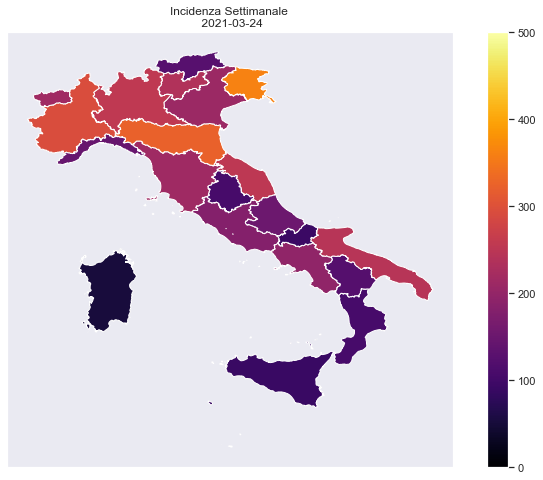

In [22]:
plot_incidenza(regioni_shape , df, '2021-03-24')

### 30 days gif

In [ ]:
df = regioni.copy()
field = 'nuovi_positivi'
df.data = pd.to_datetime(df.data)
df = df.set_index('data')

In [ ]:
last_day = '2021-03-10'
periods = 30

In [ ]:
daterange = pd.date_range(end = last_day  ,periods = periods  , freq = 'd')

In [ ]:
for d in daterange:
    day = str(d.date())
    plot_incidenza(regioni_shape , df , day , save = True);#saving all the images

#### saving the stack of images as a gif

In [ ]:
images = []
for d in daterange:
    day = str(d.date())
    im  = Image.open(f'./images/it_cv{day}.png')
    images.append(im)
    

In [ ]:
gif_name = './images/sample.gif'

In [ ]:
images[0].save(gif_name, save_all=True, append_images=images[1:], optimize=True, duration=700, loop=2)

![SegmentLocal](./images/sample.gif)

## two plots

In [5]:
df = regioni_all.copy()
df.data = pd.to_datetime(df.data)
df = df.set_index('data')

In [8]:
regioni_shape = create_regioni_shape()
popolazione = create_popolazione()

In [9]:
regioni_shape = regioni_shape.join(popolazione ,on = 'denominazione_regione' )

In [10]:
end_date = '2021-03-23'
days = 30

In [11]:
daterange = pd.date_range(end = end_date , periods = days+7 , freq='d')

In [12]:
trend = pd.DataFrame()
for i in range(30):
    one_day = df.loc[daterange[i]:daterange[i+7],:].groupby('denominazione_regione')['nuovi_positivi'].sum()
    one_day.name = f'd {i}'
    trend = pd.concat([trend,one_day],axis = 1)


In [13]:
regioni_df = regioni_shape.join(trend , on = 'denominazione_regione' )

In [14]:
regioni_df.iloc[:,-days:] = 1e5*regioni_df.iloc[:,-days:].values/regioni_df['popolazione'].values.reshape(21,1) 

In [15]:
r = regioni_df.drop(['geometry','popolazione'] , axis = 1)

In [16]:
r = r.set_index('denominazione_regione').T

<AxesSubplot:>

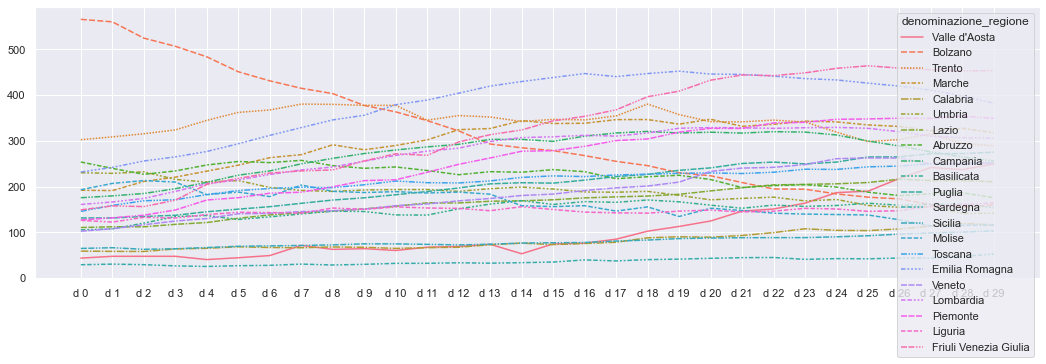

In [23]:
fig,ax = plt.subplots(figsize = (18,5))
sns.lineplot( data = r  , ax = ax )
